In [28]:
# Make sure to run this cell first to install the required packages

# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read the data
df = pd.read_csv("A1.1-data.csv")
df.drop(df.columns[0], axis=1, inplace=True)
df.rename(columns={'What is your go-to source of entertainment?':'Entertainment', 'On average, how many hours in a day do you spend consuming media?':'Hours'}, inplace=True)
df1 = df.copy()
df1.head()


,Age,Entertainment,Hours
0,18,TV Shows,5.0
1,20,TV Shows,3.0
2,21,"Social Media (YouTube, Vimeo etc.)",4.0
3,19,Anime,1.0
4,19,"Social Media (YouTube, Vimeo etc.)",10.0


c:\Users\Ali Zain\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


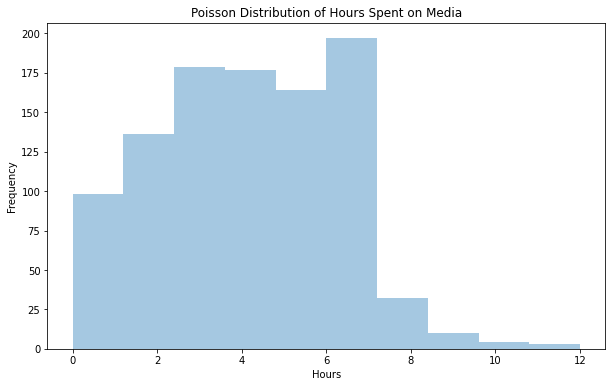

In [30]:
# calculate the posion distribution for the number of hours spent on media and plot the distribution
from scipy.stats import poisson
poisson_dist = poisson.rvs(mu=df['Hours'].mean(), size=1000)
# plot the distribution
plt.figure(figsize=(10,6))
sns.distplot(poisson_dist, bins=10, kde=False)
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Poisson Distribution of Hours Spent on Media')
plt.show()





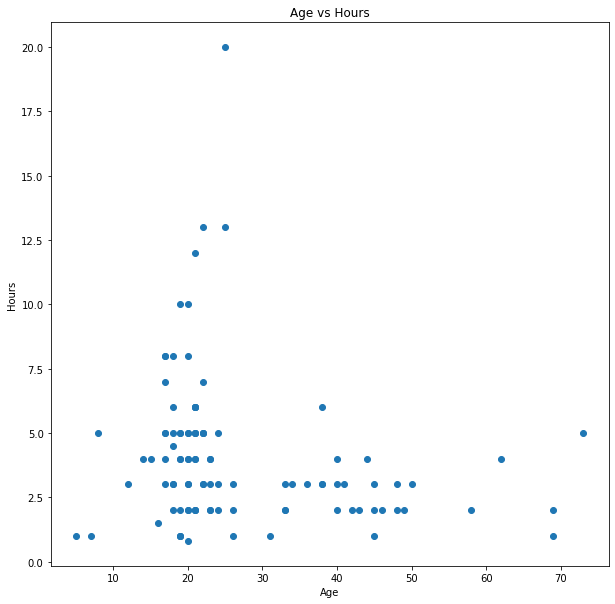

In [31]:
# Create a scatter plot of Age and Hours
plt.figure(figsize=(10, 10))
plt.scatter(df['Age'], df['Hours'])
plt.title('Age vs Hours')
plt.xlabel('Age')
plt.ylabel('Hours')
plt.show()

-0.20781915346282384
            Age     Hours
Age    1.000000 -0.207819
Hours -0.207819  1.000000


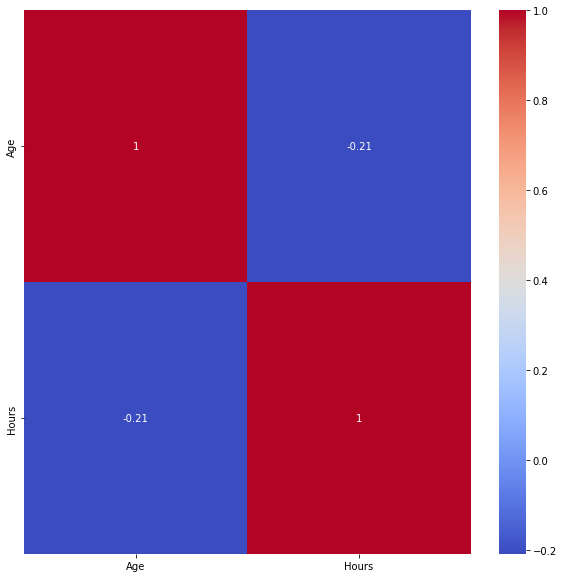

In [32]:
# Calculate the correlation using formulas
def correlation(x, y):
    x_std = (x - x.mean()) / x.std(ddof=0)
    y_std = (y - y.mean()) / y.std(ddof=0)
    return (x_std * y_std).mean()

print(correlation(df['Age'], df['Hours']))

# Calculate the correlation using corr() function
print(df.corr())
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

b_0: 5.295032499759854
b_1: -0.04576585230486801


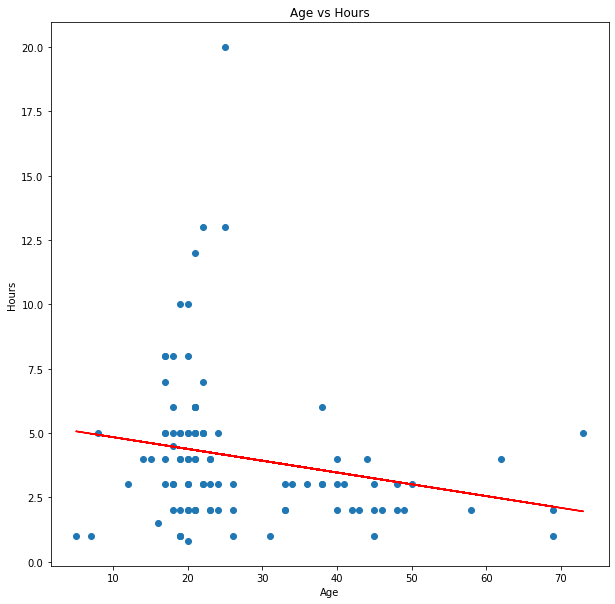

In [33]:
# Linear Regression using formulas
def linear_regression(x, y):
    x_mean = x.mean()
    y_mean = y.mean()
    x_std = x.std(ddof=0)
    y_std = y.std(ddof=0)
    r_xy = correlation(x, y)
    b_1 = r_xy * (y_std / x_std)
    b_0 = y_mean - (b_1 * x_mean)
    return b_0, b_1

b_0, b_1 = linear_regression(df['Age'], df['Hours'])

print('b_0:', b_0)
print('b_1:', b_1)

# Plot the regression line
plt.figure(figsize=(10, 10))
plt.scatter(df['Age'], df['Hours'])
plt.plot(df['Age'], b_0 + b_1 * df['Age'], color='red')
plt.title('Age vs Hours')
plt.xlabel('Age')
plt.ylabel('Hours')
plt.show()


In [34]:
# calculate the r and r-squared values
r_xy = correlation(df['Age'], df['Hours'])
r_squared = r_xy ** 2
print('r:', r_xy)
print('r-squared:', r_squared)

r: -0.20781915346282384
r-squared: 0.04318880054600473


In [35]:
# # calculate coefficient of determination using r-squared
# def coefficient_of_determination(y, y_hat):
#     SSR = ((y_hat - y.mean()) ** 2).sum()
#     SST = ((y - y.mean()) ** 2).sum()
#     return SSR / SST

# y_hat = b_0 + b_1 * df['Age']
# print('coefficient of determination:', coefficient_of_determination(df['Hours'], y_hat))

In [36]:
# check normal distribution of Age using shapiro test
from scipy.stats import shapiro
stat, p = shapiro(df['Age'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Age looks Gaussian (fail to reject H0)')
else:
    print('Age does not look Gaussian (reject H0)')

Statistics=0.817, p=0.000
Age does not look Gaussian (reject H0)


In [37]:
# Calculate Confidence Interval for Age
from scipy.stats import sem, t
import numpy as np 
confidence = 0.95
data = df['Age']
n = len(data)
m = np.mean(data)
std_err = sem(data)
h = std_err * t.ppf((1 + confidence) / 2, n - 1)
start = m - h
end = m + h
print('Confidence Interval for Age:', start, end)

Confidence Interval for Age: 24.244237200632774 29.464500663444895


In [38]:
# check normal distribution of Hours using shapiro test
from scipy.stats import shapiro
stat, p = shapiro(df['Hours'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Hours looks Gaussian (fail to reject H0)')
else:
    print('Hours does not look Gaussian (reject H0)')

Statistics=0.779, p=0.000
Hours does not look Gaussian (reject H0)


In [39]:
# Calculate Confidence Interval for Hours
from scipy.stats import sem, t
import numpy as np
confidence = 0.95
data = df['Hours']
n = len(data)
m = np.mean(data)
std_err = sem(data)
h = std_err * t.ppf((1 + confidence) / 2, n - 1)
margin_of_error = std_err * 1.96    # 95% confidence interval
start = m - h
end = m + h
print('Confidence Interval for Hours:', start, end)
print('Margin of Error:', margin_of_error)

Confidence Interval for Hours: 3.4912172333394715 4.640821601611986
Margin of Error: 0.5679934328460962


In [40]:
df1.head()

,Age,Entertainment,Hours
0,18,TV Shows,5.0
1,20,TV Shows,3.0
2,21,"Social Media (YouTube, Vimeo etc.)",4.0
3,19,Anime,1.0
4,19,"Social Media (YouTube, Vimeo etc.)",10.0


In [41]:
# Hypothesis Testing for Age
# Null Hypothesis: Age is equal to 30
# Alternate Hypothesis: Age is not equal to 30
from scipy.stats import ttest_1samp
import numpy as np

# Test Statistic
tset, pval = ttest_1samp(df['Age'], 30)
print('p-values:', pval)
print('t-values:', tset)

# Critical Value
from scipy.stats import t
alpha = 0.05
df = len(df['Age']) - 1
cv = t.ppf(1.0 - alpha, df)
print('Critical Value:', cv)
if abs(tset) <= cv:
    print('Accept Null Hypothesis')
else:
    print('Reject Null Hypothesis')


# p-value
p = (1 - t.cdf(abs(tset), df)) * 2
print('p-value:', p)
if p > alpha:
    print('Accept Null Hypothesis')
else:
    print('Reject Null Hypothesis')

#Confidence Interval
confidence = 0.95
data = df1['Age']
n = len(data)
m = np.mean(data)
std_err = sem(data)
h = std_err * t.ppf((1 + confidence) / 2, n - 1)
start = m - h
end = m + h
print('Confidence Interval for Age:', start, end)

p-values: 0.01866337300086644
t-values: -2.3904327253695357
Critical Value: 1.6599299759526005
Reject Null Hypothesis
p-value: 0.018663373000866512
Reject Null Hypothesis
Confidence Interval for Age: 24.244237200632774 29.464500663444895
